# This script contains the following:

### 1. Importing libraries and data 
### 2. Cleaning and prepairing for clustering
2.1. by birth year 
2.2. by start hour
2.3. by trip duration
### 3.1. The elbow technique by birth year
### 3.2. K-means clustering by birth year
### 4.1. The elbow technique by start hour
### 4.2. K-means clustering by start hour
### 5.1. The elbow technique by trip duration
### 5.2. K-means clustering by trip duration
### 6.1. The elbow technique by trip duration and birth year 
### 6.2. K-means clustering by trip duration and birth year

# 1. Import libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [6]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [7]:
# shortcut Path
path = r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6'

In [8]:
citi = pd.read_csv(os.path.join(path, "02 Data","Prepared Data","c_wrangled4.csv"), index_col = False)

In [9]:
citi.head()

,Unnamed: 0,bike_id,day_of_week,start_hour,ride_start,ride_start_date,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,trip_duration_min,Trip category,Birth category
0,0,16013,Mon,18,2013-09-09 18:18:00,2013-09-09,2023-12-07 18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:00,334,W 20 St & 7 Ave,40.742388,-73.997262,1968,16,10-20 minutes,31-50
1,1,15230,Thu,18,2013-09-12 18:38:00,2013-09-12,2023-12-07 18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:00,236,St Marks Pl & 2 Ave,40.728419,-73.987140,1983,9,under 10 minutes,31-50
2,2,17942,Wed,19,2013-09-18 19:44:00,2013-09-18,2023-12-07 19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:00,513,W 56 St & 10 Ave,40.768254,-73.988639,1989,6,under 10 minutes,18-30
3,3,19683,Sat,11,2013-09-28 11:54:00,2013-09-28,2023-12-07 11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:00,441,E 52 St & 2 Ave,40.756014,-73.967416,1988,9,under 10 minutes,18-30
4,4,14581,Fri,22,2013-09-27 22:01:00,2013-09-27,2023-12-07 22:01:00,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:00,432,E 7 St & Avenue A,40.726218,-73.983799,1986,7,under 10 minutes,18-30


In [10]:
citi.shape

(42990, 20)

# 2. Cleaning and prepairing for clustering

In [11]:
# Dropping unnecessary columns
citi=citi[['start_hour', 'trip_duration_min','birth_year', 'ride_start_date']]

In [12]:
citi.shape

(42990, 4)

In [13]:
citi.dtypes 

start_hour            int64
trip_duration_min     int64
birth_year            int64
ride_start_date      object
dtype: object

In [14]:
# Changing data type to datetime
citi['ride_start_date'] = pd.to_datetime(citi['ride_start_date'])

In [15]:
citi.dtypes

start_hour                    int64
trip_duration_min             int64
birth_year                    int64
ride_start_date      datetime64[ns]
dtype: object

In [16]:
citi.head()

,start_hour,trip_duration_min,birth_year,ride_start_date
0,18,16,1968,2013-09-09
1,18,9,1983,2013-09-12
2,19,6,1989,2013-09-18
3,11,9,1988,2013-09-28
4,22,7,1986,2013-09-27


### 2.1 By birth year

In [17]:
#Rides count by birth year
Birth_year_rides_counts = citi.groupby('birth_year')['ride_start_date'].count()

In [18]:
Birth_year_rides_counts

birth_year
1932     10
1933      5
1934      2
1935     14
1936      4
       ... 
1993    314
1994    149
1995     82
1996     67
1997     26
Name: ride_start_date, Length: 66, dtype: int64

In [19]:
#avg trip duration by age
birth_avg_duration = citi.groupby('birth_year')['trip_duration_min'].mean()

In [20]:
birth_avg_duration

birth_year
1932    14.900000
1933    13.400000
1934     8.500000
1935    15.214286
1936    13.250000
          ...    
1993     9.585987
1994    10.328859
1995     9.731707
1996    12.611940
1997    13.846154
Name: trip_duration_min, Length: 66, dtype: float64

In [21]:
# Merging DF together
result = pd.DataFrame({'birth_year': Birth_year_rides_counts.index, 'ride_count': Birth_year_rides_counts.values, 'avg_duration_min': birth_avg_duration.values})

In [22]:
result

,birth_year,ride_count,avg_duration_min
0,1932,10,14.900000
1,1933,5,13.400000
2,1934,2,8.500000
3,1935,14,15.214286
4,1936,4,13.250000
...,...,...,...
61,1993,314,9.585987
62,1994,149,10.328859
63,1995,82,9.731707
64,1996,67,12.611940


In [23]:
# avg age of rider by day
birth_start_hour = citi.groupby('birth_year')['start_hour'].mean()

In [24]:
birth_start_hour

birth_year
1932    13.400000
1933    11.600000
1934    14.000000
1935    13.642857
1936    18.250000
          ...    
1993    14.060510
1994    14.275168
1995    14.548780
1996    14.910448
1997    15.115385
Name: start_hour, Length: 66, dtype: float64

In [25]:
#merging it together
result_1 = pd.DataFrame({'birth_year': Birth_year_rides_counts.index, 'ride_count': Birth_year_rides_counts.values, 'avg_duration_min': birth_avg_duration.values,'start_hour':birth_start_hour.values})

In [26]:
result_1

,birth_year,ride_count,avg_duration_min,start_hour
0,1932,10,14.900000,13.400000
1,1933,5,13.400000,11.600000
2,1934,2,8.500000,14.000000
3,1935,14,15.214286,13.642857
4,1936,4,13.250000,18.250000
...,...,...,...,...
61,1993,314,9.585987,14.060510
62,1994,149,10.328859,14.275168
63,1995,82,9.731707,14.548780
64,1996,67,12.611940,14.910448


In [101]:
result_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'result_1.csv'))

### By start hour

In [27]:
#Rides per hour
hour_counts_1 = citi.groupby('start_hour')['ride_start_date'].count()

In [28]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1826
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4278
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [29]:
# avg trip duration by hour
hour_avg_duration = citi.groupby('start_hour')['trip_duration_min'].mean()

In [30]:
hour_avg_duration

start_hour
0     11.983333
1     11.218045
2     10.500000
3     10.947917
4     10.546667
5      9.620513
6     10.316085
7     11.617677
8     12.118324
9     11.642032
10    11.921687
11    12.174362
12    11.702082
13    11.980066
14    12.640983
15    12.577586
16    12.995076
17    13.205321
18    13.290556
19    12.548464
20    12.453416
21    12.360321
22    11.902502
23    11.672478
Name: trip_duration_min, dtype: float64

In [31]:
#merging together
hour_result = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values})

In [32]:
hour_result

,start_hour,ride_count,avg_duration
0,0,420,11.983333
1,1,266,11.218045
2,2,162,10.500000
3,3,96,10.947917
4,4,75,10.546667
5,5,195,9.620513
6,6,889,10.316085
7,7,1980,11.617677
8,8,3127,12.118324
9,9,2598,11.642032


In [33]:
# avg birth year by hour
avg_birth = citi.groupby('start_hour')['birth_year'].mean()

In [34]:
# merge results
result_2 = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values,'avg_age': avg_birth.values})

In [35]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,420,11.983333,1979.292857
1,1,266,11.218045,1979.409774
2,2,162,10.500000,1978.623457
3,3,96,10.947917,1981.187500
4,4,75,10.546667,1974.013333
5,5,195,9.620513,1975.615385
6,6,889,10.316085,1974.505062
7,7,1980,11.617677,1973.998990
8,8,3127,12.118324,1974.859610
9,9,2598,11.642032,1974.854119


In [102]:
result_2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'result_2.csv'))

### By trip duration 

In [36]:
# Count Rides per trip duration  
Duration_counts = citi.groupby('trip_duration_min')['ride_start_date'].count()

In [37]:
Duration_counts

trip_duration_min
1      402
2     1010
3     1879
4     2622
5     3060
6     3052
7     3036
8     2875
9     2674
10    2400
11    2123
12    1835
13    1658
14    1439
15    1361
16    1242
17    1057
18     932
19     834
20     752
21     732
22     647
23     594
24     512
25     430
26     413
27     368
28     309
29     304
30     286
31     221
32     228
33     188
34     170
35     163
36     137
37     107
38      93
39      94
40      80
41      64
42      65
43      62
44     480
Name: ride_start_date, dtype: int64

In [38]:
# Avg start hour per duration
start_hour_duration = citi.groupby('trip_duration_min')['start_hour'].mean()

In [39]:
start_hour_duration

trip_duration_min
1     14.447761
2     13.623762
3     13.811602
4     13.718535
5     13.889869
6     13.790957
7     13.973979
8     14.041739
9     13.915482
10    13.967500
11    14.042864
12    14.076839
13    13.985525
14    14.215427
15    14.203527
16    14.339775
17    14.189215
18    14.345494
19    14.555156
20    14.448138
21    14.359290
22    14.731066
23    14.372054
24    14.287109
25    14.488372
26    14.905569
27    14.633152
28    14.786408
29    14.088816
30    14.828671
31    14.533937
32    14.763158
33    14.835106
34    14.376471
35    14.349693
36    14.627737
37    14.700935
38    14.010753
39    14.159574
40    15.512500
41    14.640625
42    14.523077
43    15.693548
44    14.372917
Name: start_hour, dtype: float64

In [40]:
# Merging together
trip_duration_result = pd.DataFrame({'trip_duration': Duration_counts.index, 'trip_duration_count': Duration_counts.values, 'avg_start_hour': start_hour_duration.values})

In [41]:
trip_duration_result 

,trip_duration,trip_duration_count,avg_start_hour
0,1,402,14.447761
1,2,1010,13.623762
2,3,1879,13.811602
3,4,2622,13.718535
4,5,3060,13.889869
5,6,3052,13.790957
6,7,3036,13.973979
7,8,2875,14.041739
8,9,2674,13.915482
9,10,2400,13.967500


In [42]:
# Avg birth year by trip duration
avg_birth_duration = citi.groupby('trip_duration_min')['birth_year'].mean()

In [43]:
avg_birth_duration

trip_duration_min
1     1977.684080
2     1976.229703
3     1976.583289
4     1976.285660
5     1976.164706
6     1975.826343
7     1975.765481
8     1976.000696
9     1975.714660
10    1975.631667
11    1975.805935
12    1975.596185
13    1975.357057
14    1975.237665
15    1975.246877
16    1975.966989
17    1975.969726
18    1975.893777
19    1975.667866
20    1974.921543
21    1975.092896
22    1975.103555
23    1974.949495
24    1974.744141
25    1974.944186
26    1974.181598
27    1975.138587
28    1975.090615
29    1975.319079
30    1974.716783
31    1975.276018
32    1975.096491
33    1974.164894
34    1974.017647
35    1974.901840
36    1974.167883
37    1974.570093
38    1972.978495
39    1972.468085
40    1974.387500
41    1972.968750
42    1972.430769
43    1973.354839
44    1974.404167
Name: birth_year, dtype: float64

In [44]:
# Merge all together 
result_3 = pd.DataFrame({'trip_duration': Duration_counts.index, 'trip_duration_count': Duration_counts.values, 'avg_start_hour': start_hour_duration.values,'avg_birth': avg_birth_duration.values})

In [45]:
result_3

,trip_duration,trip_duration_count,avg_start_hour,avg_birth
0,1,402,14.447761,1977.684080
1,2,1010,13.623762,1976.229703
2,3,1879,13.811602,1976.583289
3,4,2622,13.718535,1976.285660
4,5,3060,13.889869,1976.164706
5,6,3052,13.790957,1975.826343
6,7,3036,13.973979,1975.765481
7,8,2875,14.041739,1976.000696
8,9,2674,13.915482,1975.714660
9,10,2400,13.967500,1975.631667


In [103]:
result_3.to_csv(os.path.join(path, '02 Data','Prepared Data', 'result_3.csv'))

## 3.1. The elbow technique by birth year

In [46]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [47]:
score = [kmeans[i].fit(result_1).score(result_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-23832482.70631861,
 -5159596.219806419,
 -2179671.2229684363,
 -1060219.7715194623,
 -626360.3985582654,
 -453936.7305280169,
 -312850.01818806404,
 -229982.6350812299,
 -180471.20438219295]

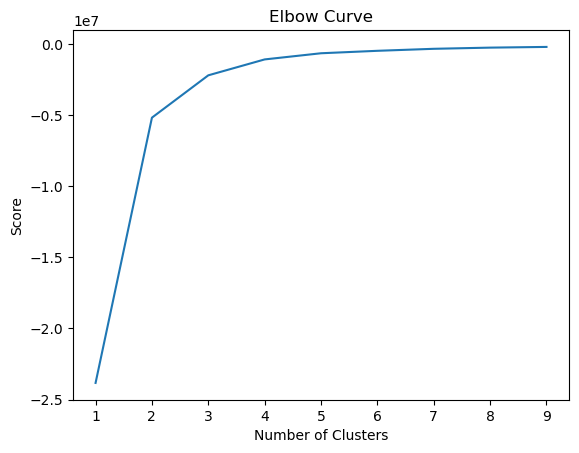

In [48]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  In this example, there's a large jump from two to three on the x-axis,later small jump to 4, and after that the curve straightens out. This means that the optimal count for clusters is four.

## 3.2. K-means clustering by birth year

In [49]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [50]:
# Fit the k-means object to the data.
kmeans.fit(result_1)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [51]:
result_1['clusters'] = kmeans.fit_predict(result_1)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
result_1.head()

,birth_year,ride_count,avg_duration_min,start_hour,clusters
0,1932,10,14.900000,13.400000,1
1,1933,5,13.400000,11.600000,1
2,1934,2,8.500000,14.000000,1
3,1935,14,15.214286,13.642857,1
4,1936,4,13.250000,18.250000,1


In [53]:
#cluster count
result_1['clusters'].value_counts()

clusters
1    25
3    16
0    14
2    11
Name: count, dtype: int64

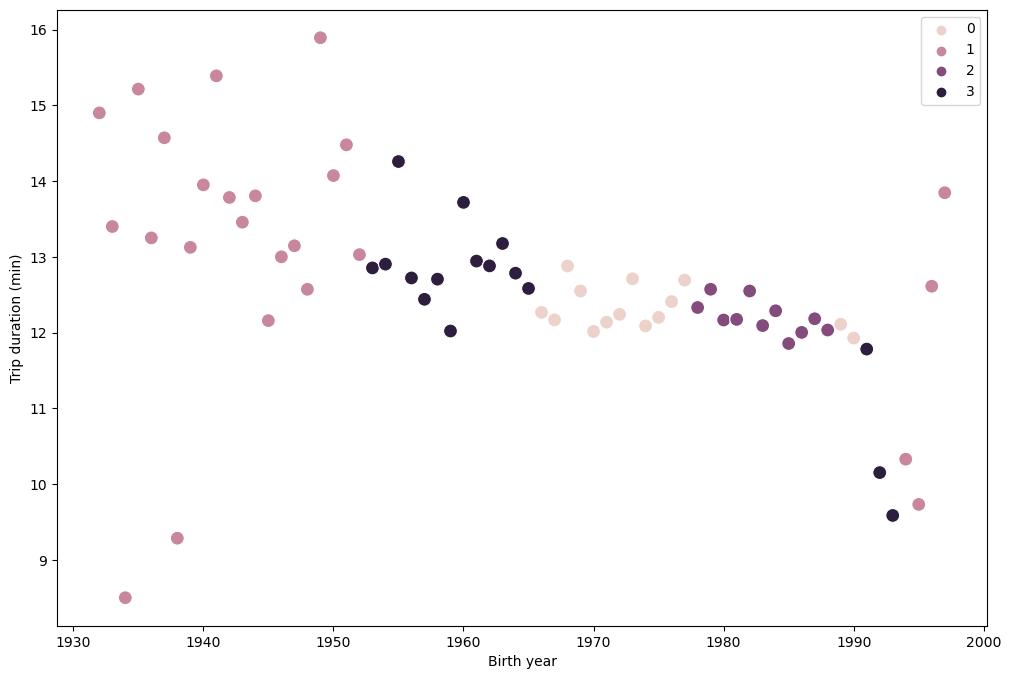

In [54]:
# Plot the clusters for the "Birth year" and "Trip duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_1['birth_year'], y=result_1['avg_duration_min'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Birth year') # Label x-axis.
plt.ylabel('Trip duration (min)') # Label y-axis.
plt.show()

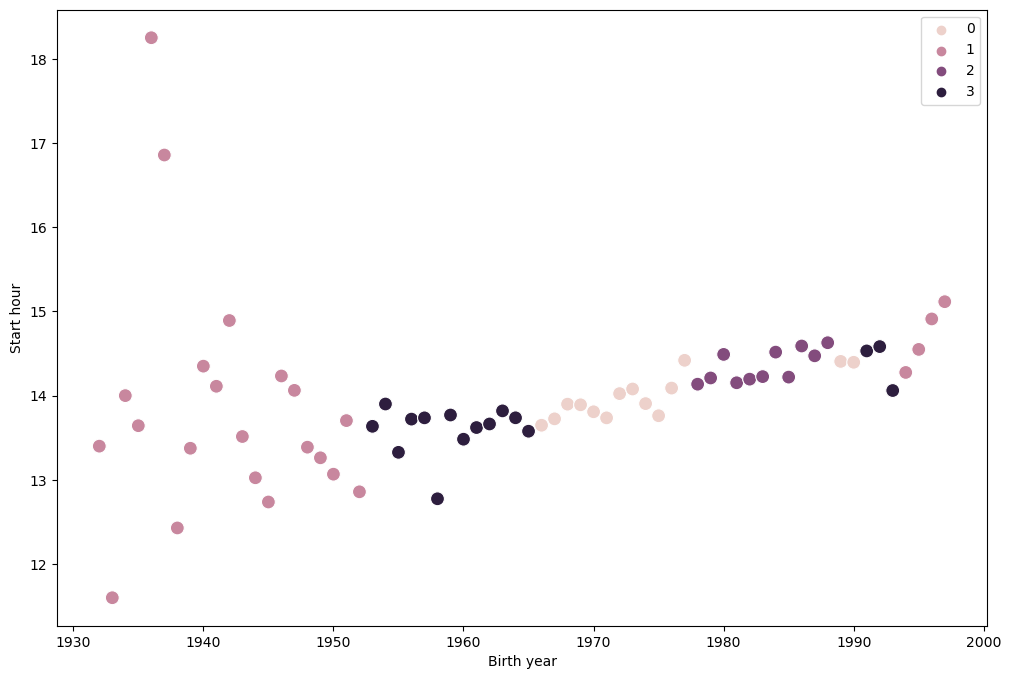

In [55]:
# Plot the clusters for the "Birth year" and "Start hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_1['birth_year'], y=result_1['start_hour'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Birth year') # Label x-axis.
plt.ylabel('Start hour') # Label y-axis.
plt.show()

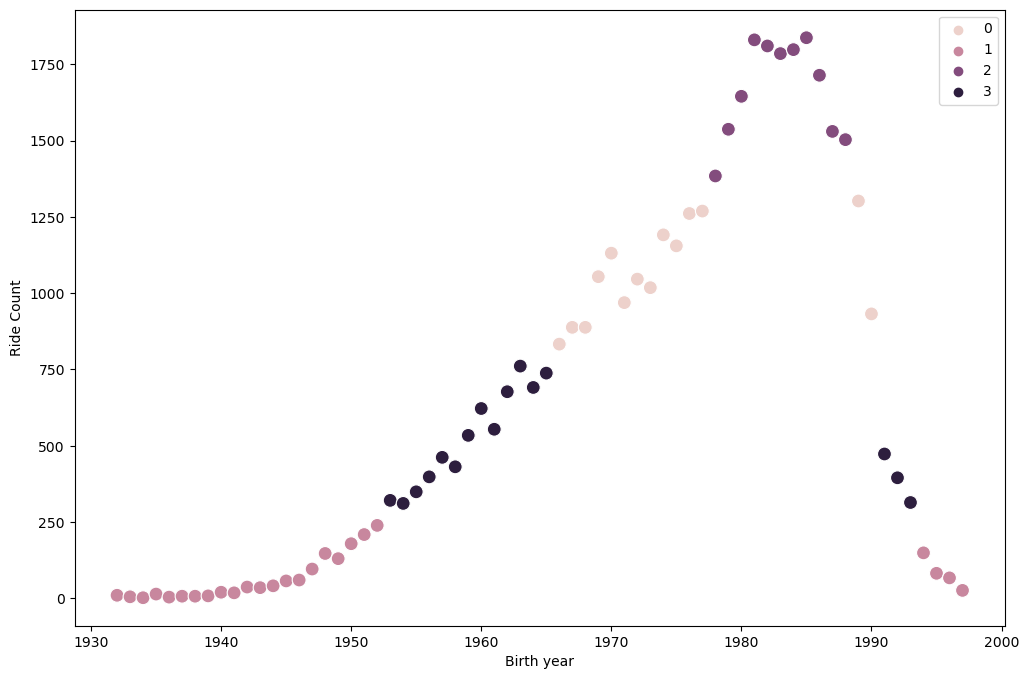

In [56]:
# Plot the clusters for the "Birth year" and "Ride Counts" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_1['birth_year'], y=result_1['ride_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Birth year') # Label x-axis.
plt.ylabel('Ride Count') # Label y-axis.
plt.show()

In [57]:
result_1.loc[result_1['clusters'] == 0, 'cluster'] = 'light pink'
result_1.loc[result_1['clusters'] == 1, 'cluster'] = 'pink'
result_1.loc[result_1['clusters'] == 2, 'cluster'] = 'purple'
result_1.loc[result_1['clusters'] == 3, 'cluster'] = 'dark purple'

In [58]:
result_1.groupby('cluster').agg({"birth_year":['mean', 'median'],'ride_count':['mean', 'median'], 
                         'avg_duration_min':['mean', 'median'], 
                         'start_hour':['mean', 'median']})

birth_year           ride_count         avg_duration_min  \
                    mean  median         mean  median             mean   
cluster                                                                  
dark purple  1965.187500  1960.5   501.937500   467.5        12.469232   
light pink   1974.071429  1972.5  1066.928571  1050.0        12.313730   
pink         1950.560000  1944.0    65.960000    37.0        13.099905   
purple       1983.000000  1983.0  1670.272727  1714.0        12.204237   

                       start_hour             
                median       mean     median  
cluster                                       
dark purple  12.752738  13.746034  13.728518  
light pink   12.220892  13.984682  13.901885  
pink         13.400000  13.984205  13.703349  
purple       12.174317  14.348637  14.225770

## Older users (1944-1950) has less rides counts, as years rise users has more rides, users with birth year 1983 has most rides. After 1983 birth year rides count droping slowly. Average trip duration and start hour doesnt have big difference. 

## 4.1. The elbow technique by start hour

In [59]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [60]:
score = [kmeans[i].fit(result_2).score(result_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-37424738.22017785,
 -10739465.674788538,
 -4343953.615746512,
 -2000073.4902479467,
 -981820.9030702743,
 -360996.5667602158,
 -185382.8003393519,
 -126002.26931483459,
 -94463.98763777937]

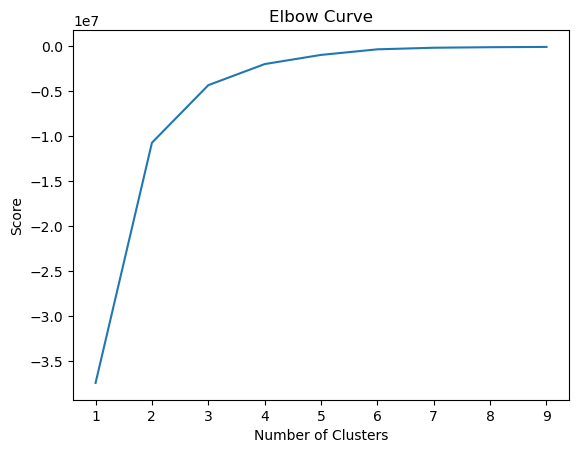

In [61]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  In this example, there's a large jump from two to three on the x-axis,later small jump to 4, and after that the curve straightens out. This means that the optimal count for clusters is four.

### 4.2. K-means clustering by start hour

In [62]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [63]:
# Fit the k-means object to the data.
kmeans.fit(result_2)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [64]:
result_2['clusters'] = kmeans.fit_predict(result_2)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
result_2.head()

,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,420,11.983333,1979.292857,1
1,1,266,11.218045,1979.409774,1
2,2,162,10.500000,1978.623457,1
3,3,96,10.947917,1981.187500,1
4,4,75,10.546667,1974.013333,1


In [66]:
#cluster count
result_2['clusters'].value_counts()

clusters
1    8
0    8
3    6
2    2
Name: count, dtype: int64

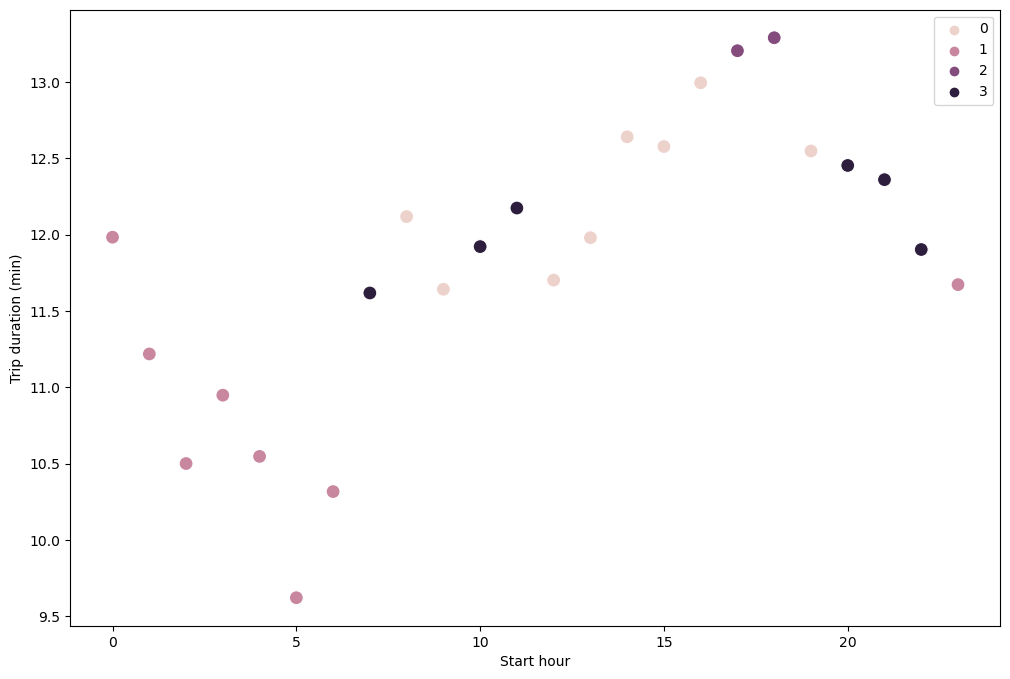

In [67]:
# Plot the clusters for the "Start hour" and "Trip duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['avg_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start hour') # Label x-axis.
plt.ylabel('Trip duration (min)') # Label y-axis.
plt.show()

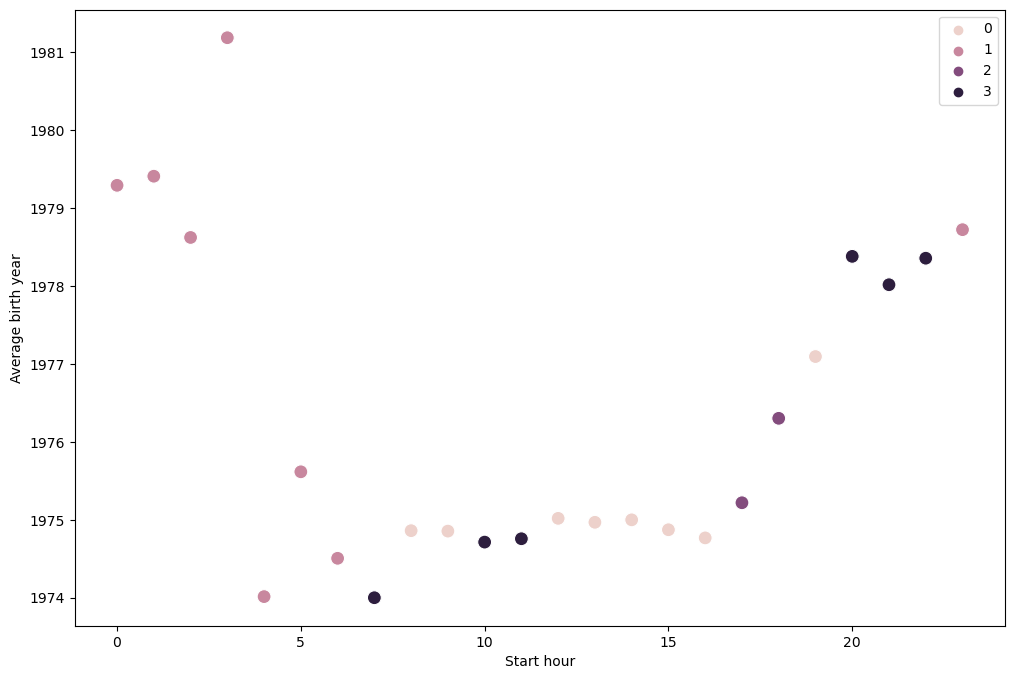

In [68]:
# Plot the clusters for the "Start hour" and "Average birth year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start hour') # Label x-axis.
plt.ylabel('Average birth year') # Label y-axis.
plt.show()

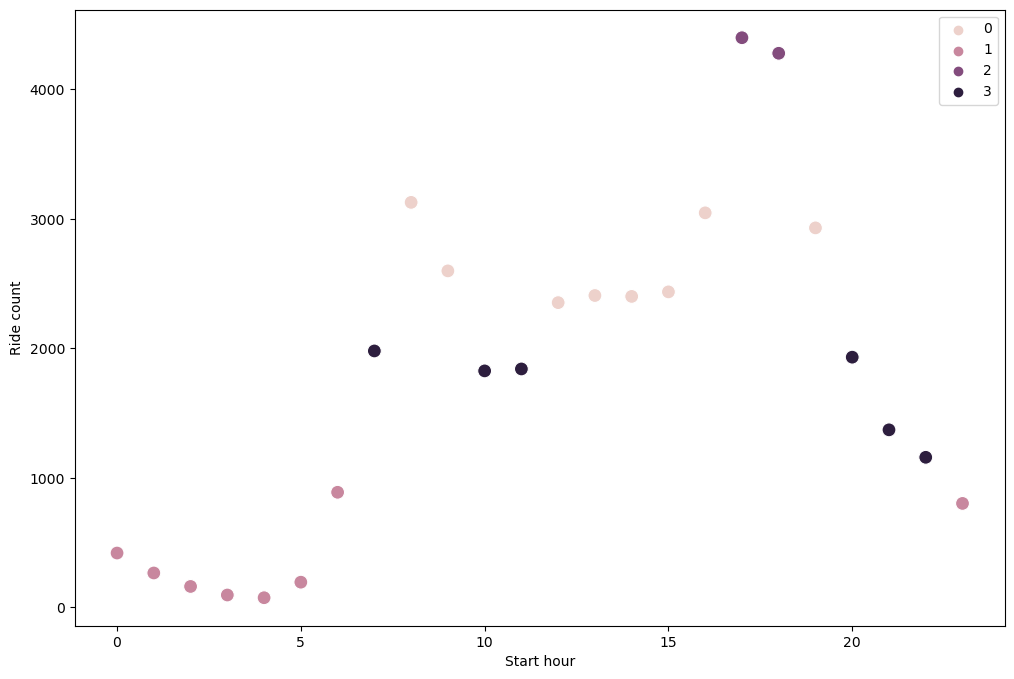

In [69]:
# Plot the clusters for the "Start hour" and "Average birth year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['ride_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start hour') # Label x-axis.
plt.ylabel('Ride count') # Label y-axis.
plt.show()

In [70]:
result_2.loc[result_2['clusters'] == 0, 'cluster'] = 'light pink'
result_2.loc[result_2['clusters'] == 1, 'cluster'] = 'pink'
result_2.loc[result_2['clusters'] == 2, 'cluster'] = 'purple'
result_2.loc[result_2['clusters'] == 3, 'cluster'] = 'dark purple'

In [71]:
result_2.groupby('cluster').agg({"start_hour":['mean', 'median'],'ride_count':['mean', 'median'], 
                         'avg_duration':['mean', 'median'], 
                         'avg_age':['mean', 'median']})

start_hour          ride_count         avg_duration             \
                  mean median         mean  median         mean     median   
cluster                                                                      
dark purple  15.166667   15.5  1684.833333  1833.5    12.071661  12.048024   
light pink   13.250000   13.5  2662.375000  2517.0    12.275577  12.333394   
pink          5.500000    3.5   363.250000   230.5    10.850630  10.747292   
purple       17.500000   17.5  4338.000000  4338.0    13.247938  13.247938   

                 avg_age               
                    mean       median  
cluster                                
dark purple  1976.370511  1976.386443  
light pink   1975.178852  1974.919352  
pink         1977.671363  1978.673497  
purple       1975.760032  1975.760032

## At night time less rides and trip duration shorter that at daytime. At night younger users (1977) rides more.

### 5.1. The elbow technique by trip duration

In [72]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [73]:
score = [kmeans[i].fit(result_3).score(result_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-40816860.70711736,
 -7947627.867123478,
 -3232092.670525222,
 -1624474.148461511,
 -1092305.1418322786,
 -759788.213018068,
 -468115.1192651724,
 -342872.7635373096,
 -252274.1277944542]

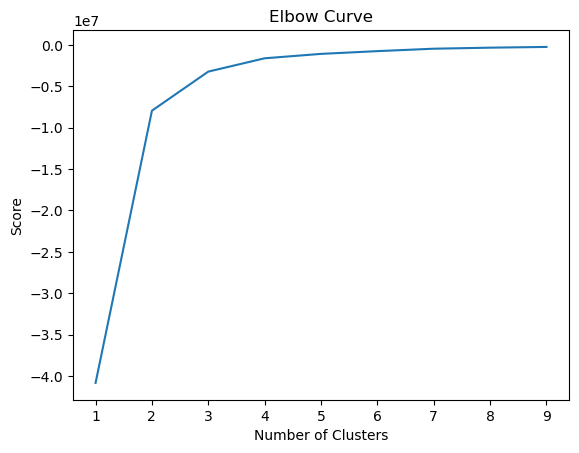

In [74]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### In this example, there's a large jump from two to three on the x-axis,later small jump to 4, and after that the curve straightens out. This means that the optimal count for clusters is four.

### 5.2. K-means clustering by trip duration

In [75]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [76]:
# Fit the k-means object to the data.
kmeans.fit(result_3)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [77]:
result_3['clusters'] = kmeans.fit_predict(result_3)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [78]:
result_3.head()

,trip_duration,trip_duration_count,avg_start_hour,avg_birth,clusters
0,1,402,14.447761,1977.684080,1
1,2,1010,13.623762,1976.229703,3
2,3,1879,13.811602,1976.583289,0
3,4,2622,13.718535,1976.285660,2
4,5,3060,13.889869,1976.164706,2


In [79]:
#cluster count
result_3['clusters'].value_counts()

clusters
1    22
3     8
0     7
2     7
Name: count, dtype: int64

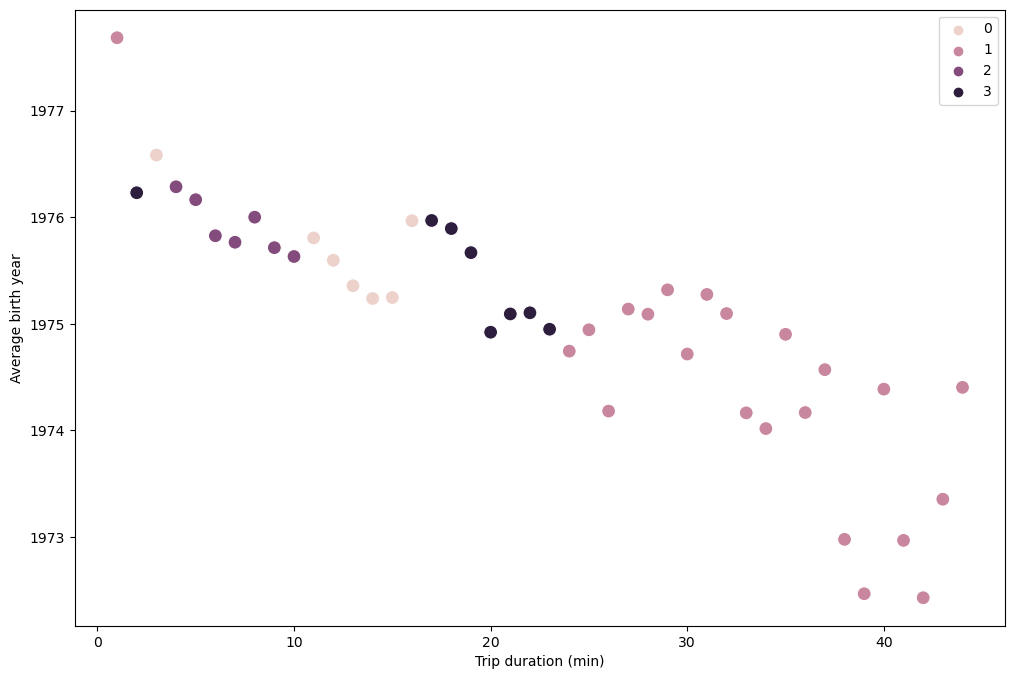

In [80]:
# Plot the clusters for the "Trip duration" and "Average birth year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_3['trip_duration'], y=result_3['avg_birth'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trip duration (min)') # Label x-axis.
plt.ylabel('Average birth year') # Label y-axis.
plt.show()

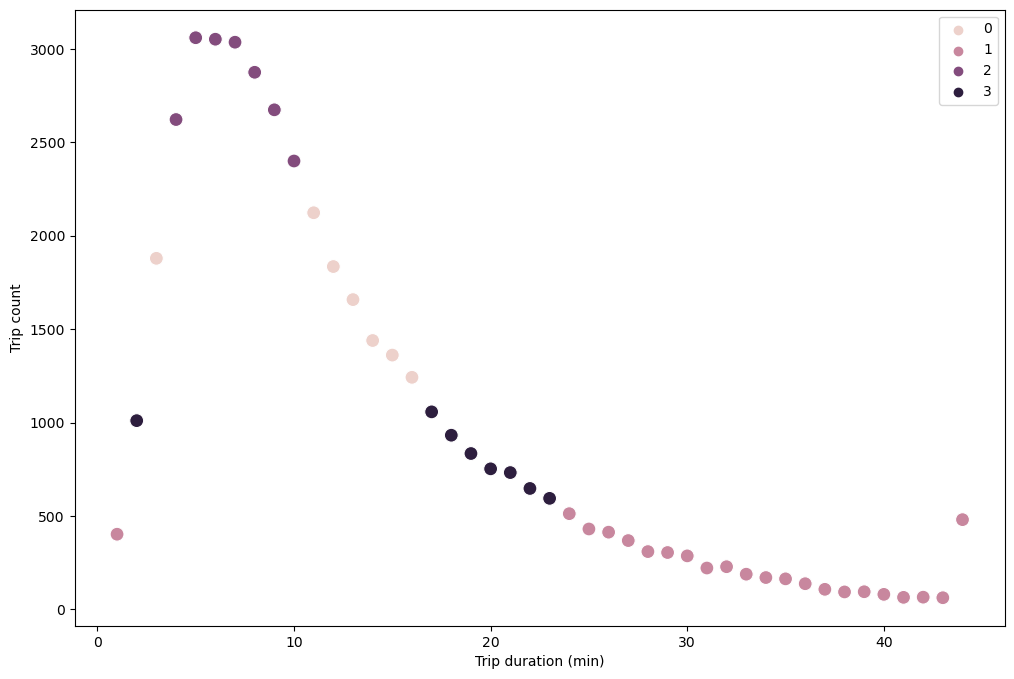

In [81]:
# Plot the clusters for the "Trip duration" and "Average birth year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_3['trip_duration'], y=result_3['trip_duration_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trip duration (min)') # Label x-axis.
plt.ylabel('Trip count') # Label y-axis.
plt.show()

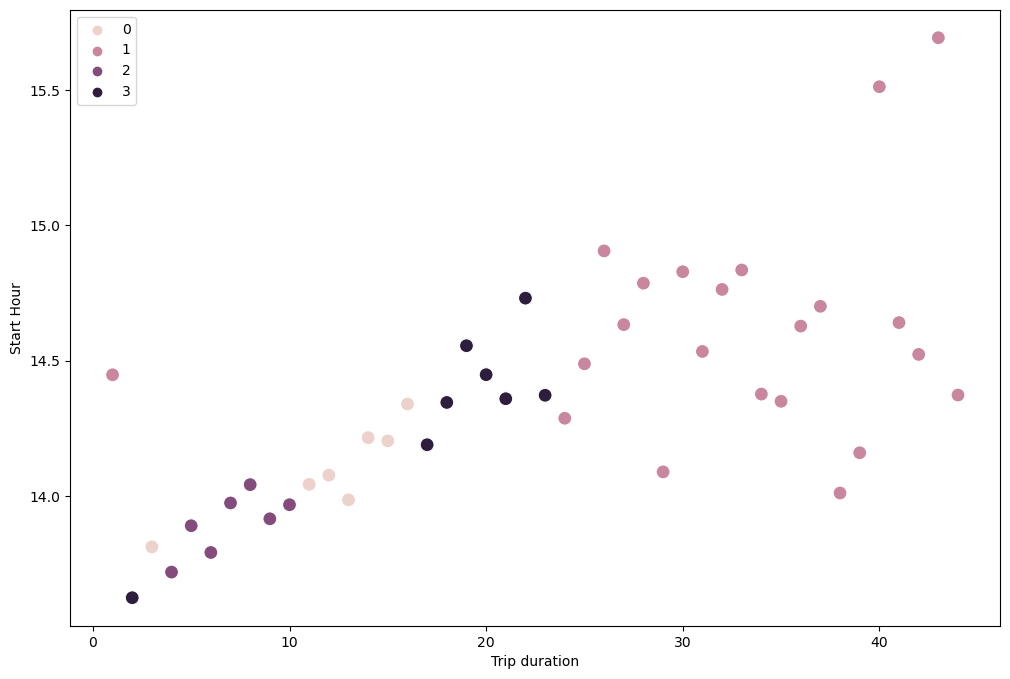

In [82]:
# Plot the clusters for the "Trip duration" and "Average birth year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_3['trip_duration'], y=result_3['avg_start_hour'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trip duration') # Label x-axis.
plt.ylabel('Start Hour') # Label y-axis.
plt.show()

In [83]:
result_3.loc[result_3['clusters'] == 0, 'cluster'] = 'light pink'
result_3.loc[result_3['clusters'] == 1, 'cluster'] = 'pink'
result_3.loc[result_3['clusters'] == 2, 'cluster'] = 'purple'
result_3.loc[result_3['clusters'] == 3, 'cluster'] = 'dark purple'

In [84]:
result_3.groupby('cluster').agg({"trip_duration": ['mean', 'median'],'trip_duration_count':['mean', 'median'], 
                         'avg_start_hour':['mean', 'median'], 
                         'avg_birth':['mean', 'median']})

trip_duration        trip_duration_count         avg_start_hour  \
                     mean median                mean  median           mean   
cluster                                                                       
dark purple         17.75   19.5          819.750000   793.0      14.328022   
light pink          12.00   13.0         1648.142857  1658.0      14.096508   
pink                32.50   33.5          235.272727   204.5      14.616631   
purple               7.00    7.0         2817.000000  2875.0      13.899723   

                          avg_birth               
                median         mean       median  
cluster                                           
dark purple  14.365672  1975.478570  1975.385710  
light pink   14.076839  1975.684857  1975.596185  
pink         14.580837  1974.409388  1974.487130  
purple       13.915482  1975.912745  1975.826343

## Most rides has duration about 7-11 min. Less rides has longlasting duration (17-32 min)

### 6.1. The elbow technique by trip duration and birth year 

In [85]:
citi_1 =citi[[ 'trip_duration_min', 'birth_year']]

In [86]:
citi_1

,trip_duration_min,birth_year
0,16,1968
1,9,1983
2,6,1989
3,9,1988
4,7,1986
...,...,...
42985,16,1973
42986,25,1975
42987,19,1970
42988,17,1961


### 6.1. The elbow technique by trip duration and birth year 

In [87]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [88]:
score = [kmeans[i].fit(citi_1).score(citi_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-8398793.459920919,
 -4773763.019509128,
 -3085871.088056895,
 -2405355.4601058164,
 -1964334.4791116796,
 -1646771.6721860413,
 -1423929.7383493371,
 -1237971.0722265646,
 -1133317.5434706686]

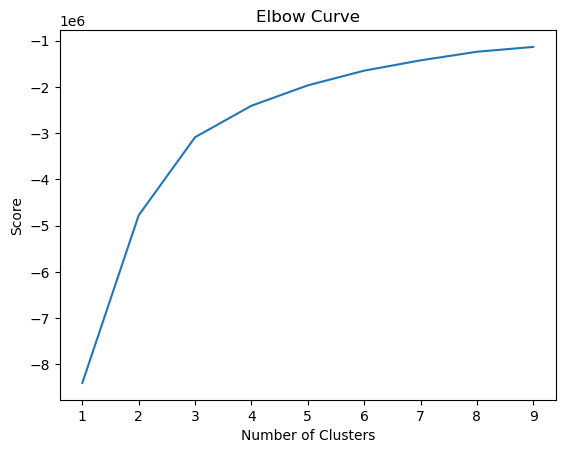

In [89]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 6.2. K-means clustering by trip duration and birth year

In [90]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [91]:

kmeans.fit(citi_1)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [92]:
citi_1['clusters'] = kmeans.fit_predict(citi_1)

C:\Users\irikh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irikh\AppData\Local\Temp\ipykernel_23328\246121633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi_1['clusters'] = kmeans.fit_predict(citi_1)


In [93]:
citi_1.head (60)

,trip_duration_min,birth_year,clusters
0,16,1968,3
1,9,1983,0
2,6,1989,0
3,9,1988,0
4,7,1986,0
5,10,1994,0
6,4,1969,3
7,11,1993,0
8,9,1983,0
9,20,1985,0


In [94]:
citi_1['clusters'].value_counts()

clusters
0    17540
3    12092
1     7096
2     6262
Name: count, dtype: int64

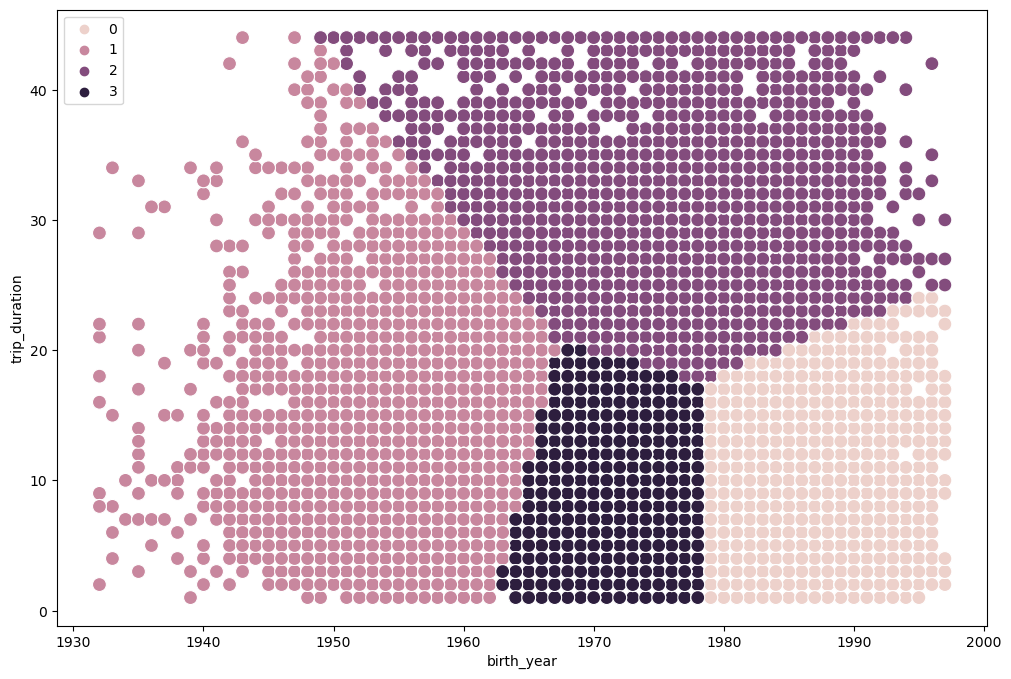

In [98]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_1['birth_year'], y=citi_1['trip_duration_min'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('birth_year') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

In [99]:
citi_1.loc[citi_1['clusters'] == 0, 'cluster'] = 'light pink'
citi_1.loc[citi_1['clusters'] == 1, 'cluster'] = 'pink'
citi_1.loc[citi_1['clusters'] == 2, 'cluster'] = 'purple'
citi_1.loc[citi_1['clusters'] == 3, 'cluster'] = 'dark purple'

In [100]:
citi_1.groupby('cluster').agg({'trip_duration_min':['mean', 'median'], 
                         'birth_year':['mean', 'median']})

trip_duration_min          birth_year        
                         mean median         mean  median
cluster                                                  
dark purple          8.700215    8.0  1972.022246  1972.0
light pink           9.183295    8.0  1984.920981  1985.0
pink                12.235908   11.0  1957.413331  1959.0
purple              28.370968   26.0  1977.544075  1979.0

In [105]:
citi_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_1.csv'))

#### Users with average birth year 1972-1984 (30-40 y.o.)  mostly rides with avr. trip duration 9 min. Most Older users (up to 1960, which id 50-60 y.o.) rides sligthly longer in average 12 min. But there is no relation  bwn longest trip and birth year (age).